# Kalman-and-Bayesian-Filters-in-Python: g-h-filter
> I found an amazing free online book about Bayesian-Filters called *Kalman-and-Bayesian-Filters-in-Python*. Here are my notes about the g-h-filter.

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [bayesian-filters, gh-filter, kalman filter]
- image: images/gh-filter.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

I looked at the book: [Kalman-and-Bayesian-Filters-in-Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/00-Preface.ipynb) and here is my notes about the chapter: [01-g-h-filter](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/01-g-h-filter.ipynb).

In [1]:
#hide
import warnings
warnings.filterwarnings("ignore")

In [2]:
#collapse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint

## Exercise: Write Generic Algorithm

In [3]:
def g_h_filter(data, x0, dx, g, h, dt):
    """
    Performs g-h filter on 1 state variable with a fixed g and h.

    'data' contains the data to be filtered.
    'x0' is the initial value for our state variable
    'dx' is the initial change rate for our state variable
    'g' is the g-h's g scale factor
    'h' is the g-h's h scale factor
    'dt' is the length of the time step 
    """
    
    x_est = x0
    results = []
    for z in data:
        #prediction step:
        x_pred = x_est + dx*dt
        dx = dx
        
        #update step:
        residual = z - x_pred
        dx= dx + h*residual/dt
        x_est = x_pred + g*residual
        
        results.append(x_est)
        
    return np.array(results)

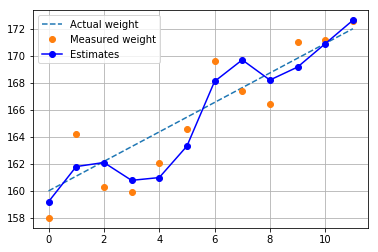

In [4]:
#collapse
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)

fig,ax=plt.subplots()
ax.plot([0, 11], [160, 172], '--', label='Actual weight');
ax.plot(weights, 'o', label='Measured weight');
ax.plot(data, 'b-o', label='Estimates');

ax.grid(True)
ax.legend();

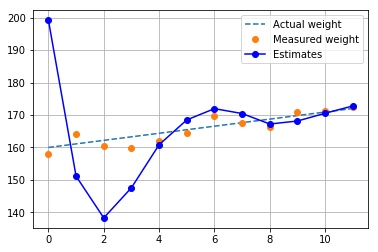

In [5]:
#collapse
data = g_h_filter(data=weights, x0=260., dx=1., g=6./10, h=2./3, dt=1.)

fig,ax=plt.subplots()
ax.plot([0, 11], [160, 172], '--', label='Actual weight');
ax.plot(weights, 'o', label='Measured weight');
ax.plot(data, 'b-o', label='Estimates');

ax.grid(True)
ax.legend();

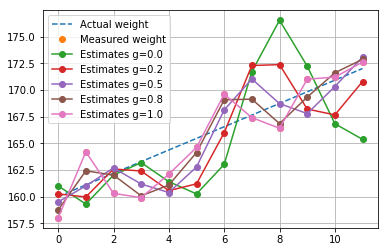

In [6]:
#collapse
N=5

fig,ax=plt.subplots()
ax.plot([0, 11], [160, 172], '--', label='Actual weight');
ax.plot(weights, 'o', label='Measured weight');

for g in np.linspace(0,1,N):
    data = g_h_filter(data=weights, x0=160., dx=1., g=g, h=0.9, dt=1.)

    ax.plot(data, '-o', label='Estimates g=%0.1f'%g);

ax.grid(True)
ax.legend();